## Supervised/Umsupervised/Half-supervised dimension reduction through UMAP.
## Comparation with Stim map is possible here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.io import arff
import pandas as pd

wp = r'D:\ZR\_Codes\2P_Analysis\_Projects\230412_UMAP_Learning'
mnist = np.array(pd.DataFrame(arff.loadarff(wp+'\Fashion-MNIST.arff')[0]))
mnist_data = mnist[:,:-1]
mnist_label = mnist[:,-1].astype('i4')


In [2]:
# seperate data into train and test.
train, train_labels = mnist_data[:60000],mnist_label[:60000]
test, test_labels = mnist_data[60000:],mnist_label[60000:]
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

## First, Traditional unsupervised learning.

In [3]:
import umap
embedding = umap.UMAP(n_neighbors=5).fit_transform(data)
# neighbors = 5 means very local information.

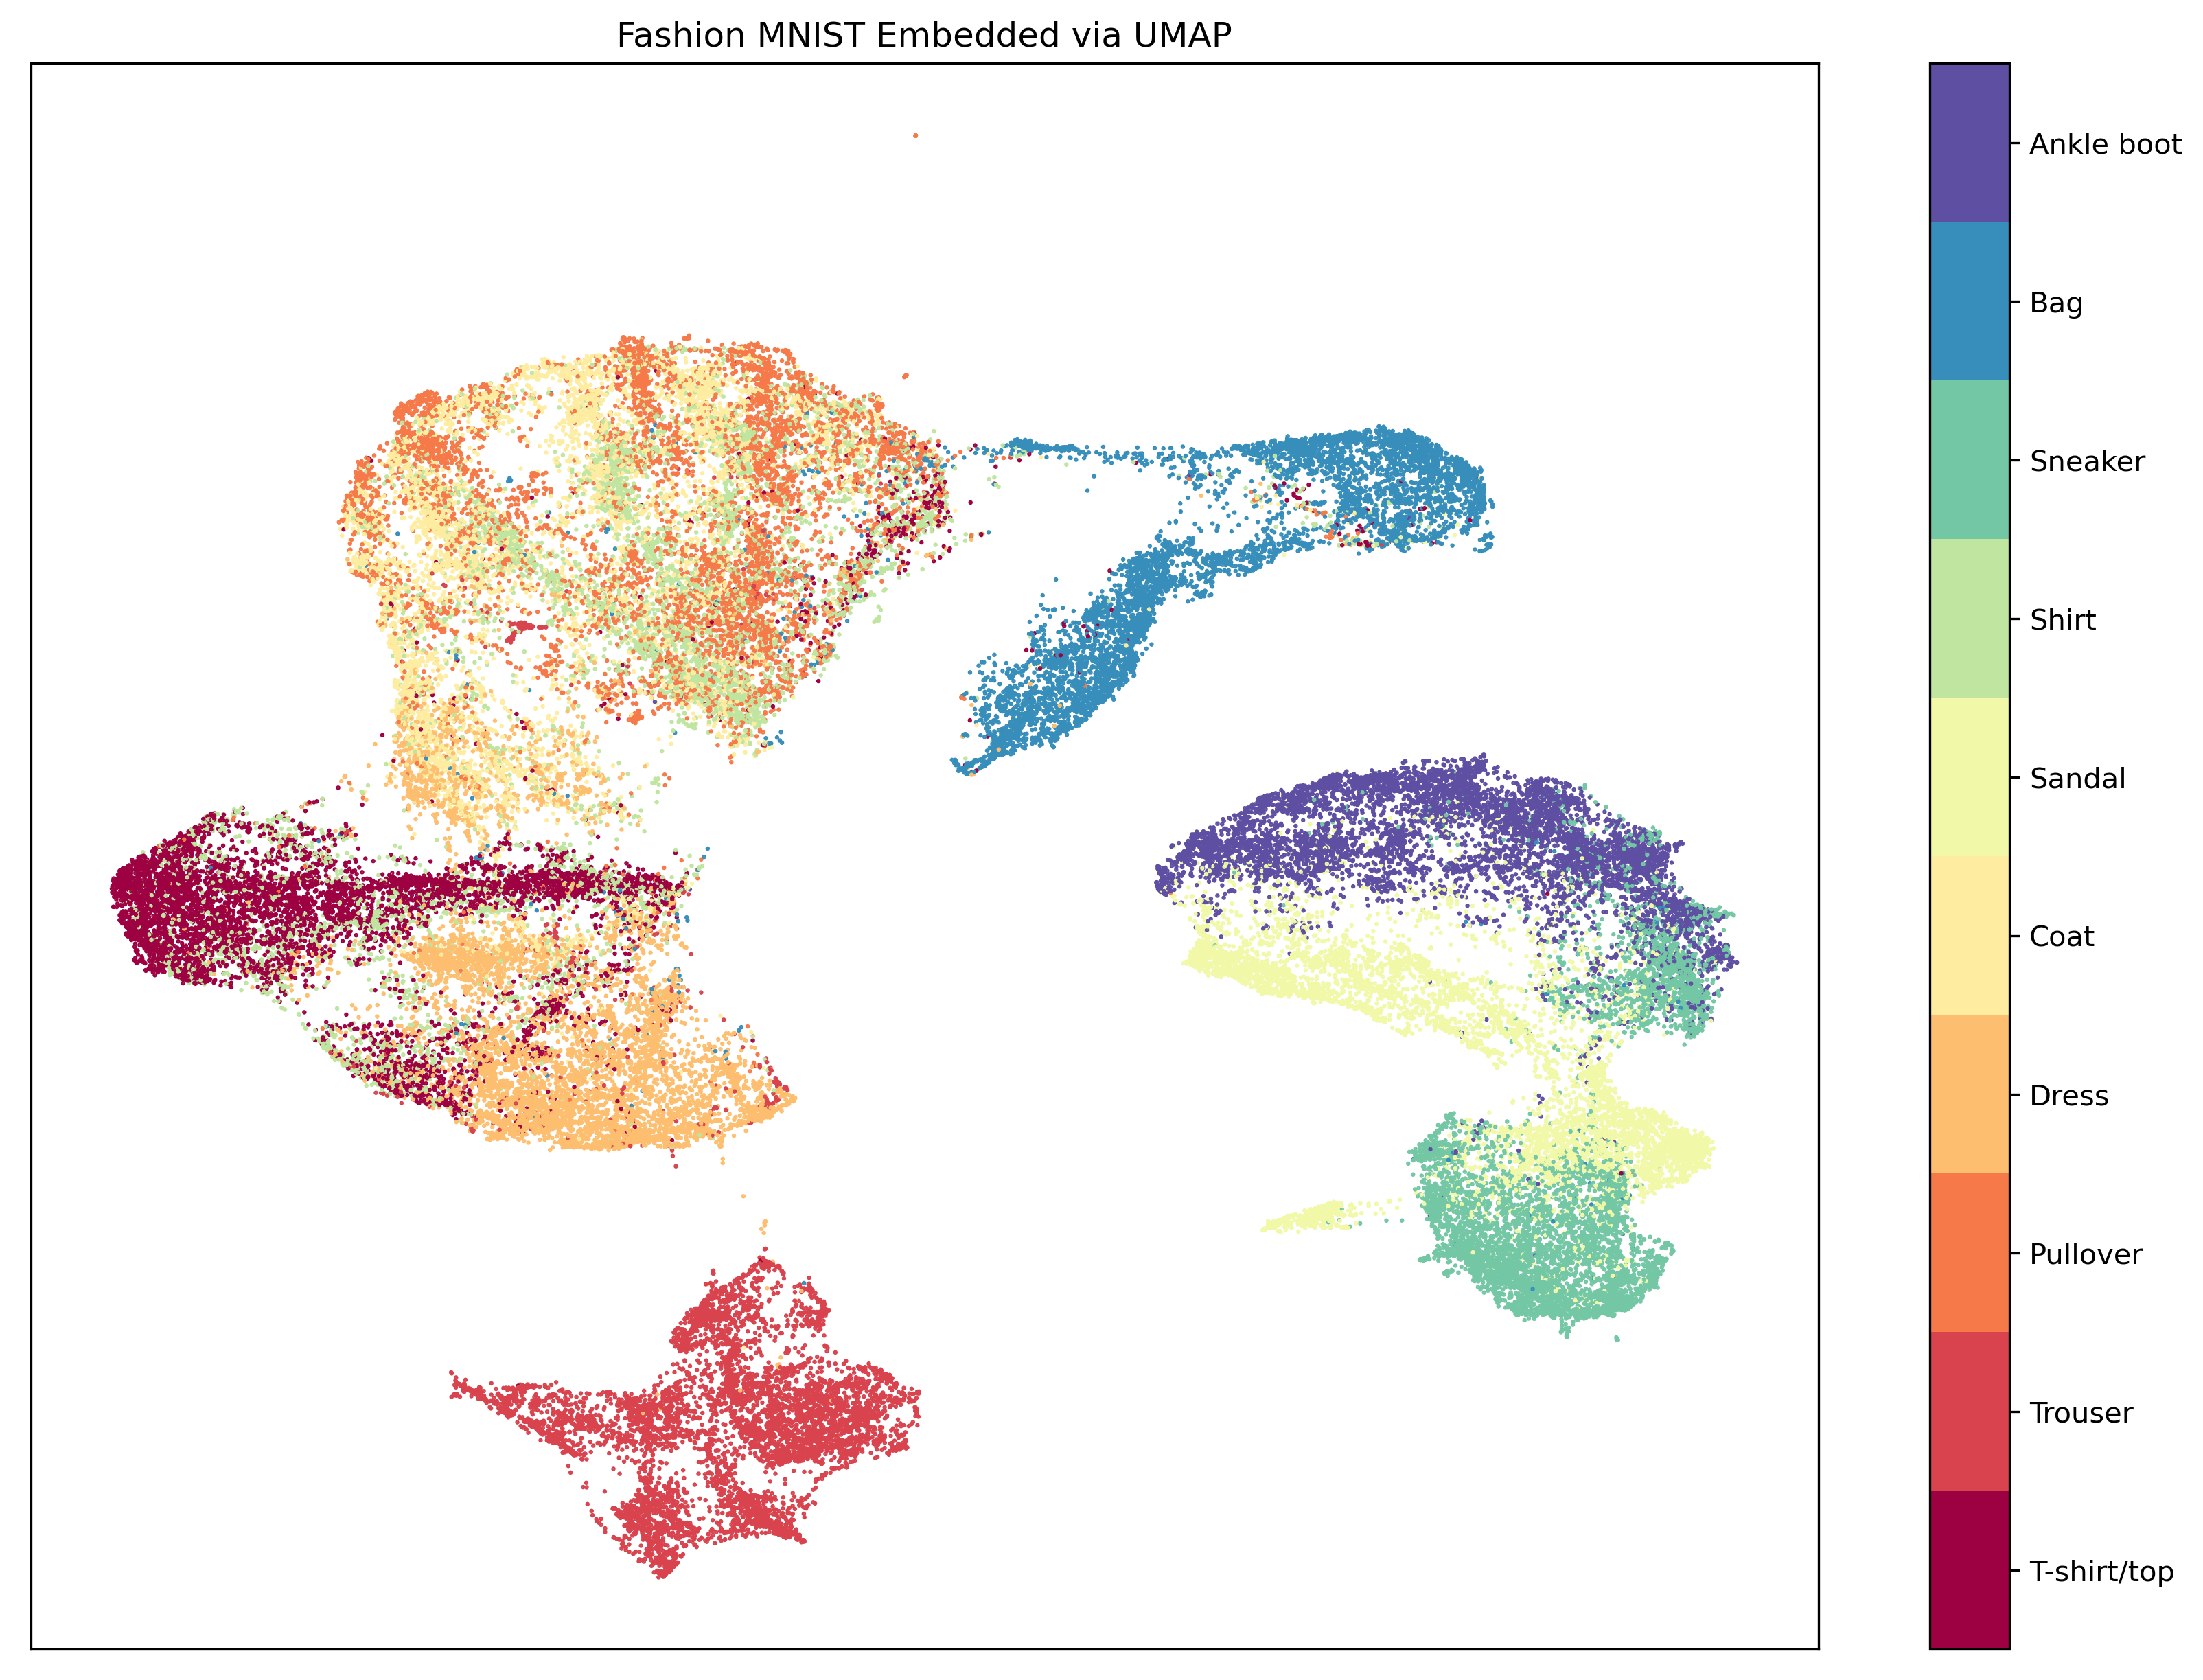

In [4]:
fig, ax = plt.subplots(1, figsize=(14, 10),dpi = 300)
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP');

### ↑This result is okay for unsupervised data. But still, some clusters are not seperated.
### ↓ Supervised Learning will solve this problem

In [ ]:
%%time
# remember, bigger n-neighbor is better for supervised learning.
embedding = umap.UMAP().fit_transform(data, y=target)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');